# All Movies Analsyis: The Basics
To begin looking at how gender affects dialogue in these movies let's get some basic stats first. Specifically:
* Token count per line
* Type count per line

How do these vary based on gender? Later on I hope to look at these character by character:
* Token count per character
* Type counter per character
* TTR per character

I'm not doing TTR line by line, because some of these lines are incredibly short, creating huge TTRs. It's best to look at a character's overall TTR

## 1) Token count

In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
movie_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_movies.pkl")

In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries, 0 to 14095
Data columns (total 10 columns):
Disney_Period       14096 non-null object
Gender              14096 non-null object
Movie               14096 non-null object
Role                14096 non-null object
Song                14096 non-null object
Speaker             14096 non-null object
Speaker_Status      14096 non-null object
Text                14096 non-null object
UTTERANCE_NUMBER    14096 non-null int64
Year                14096 non-null int64
dtypes: int64(2), object(8)
memory usage: 660.8+ KB


In [5]:
movie_df["Tokens"] = movie_df.Text.map(nltk.word_tokenize)

In [6]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]"


In [7]:
movie_df["Types"] = movie_df.Tokens.map(set)

In [8]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{me, ., summon, and, through, !, come, i, mirr..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{?, thou, know, wouldst, my, queen, what, ,}"
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{fairest, who, ?, mirror, ,, one, on, of, magi..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{maid, ., grace, hide, she, is, i, her, beauty..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{alas, name, for, ., reveal, !, her}"


In [9]:
movie_df["Token_Count"] = movie_df.Tokens.map(len)

In [10]:
movie_df["Type_Count"] = movie_df.Types.map(len)

In [11]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{me, ., summon, and, through, !, come, i, mirr...",26,24
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{?, thou, know, wouldst, my, queen, what, ,}",8,8
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{fairest, who, ?, mirror, ,, one, on, of, magi...",14,13
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{maid, ., grace, hide, she, is, i, her, beauty...",33,27
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{alas, name, for, ., reveal, !, her}",8,7


In [12]:
movie_df[["Token_Count", "Type_Count"]].describe()

,Token_Count,Type_Count
count,14096.000000,14096.000000
mean,12.906711,10.572999
std,17.305506,10.313149
min,0.000000,0.000000
25%,5.000000,4.000000
50%,9.000000,8.000000
75%,15.000000,13.000000
max,480.000000,181.000000


Average token count per line is about 12.9 tokens, average type count is almost 10.5. Somewhat large standard deviations

In [13]:
movie_df[movie_df.Token_Count == 0] # could be silent responses

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
6335,LATE,m,Tangled,PRO,D,flynn,NON-P,,348,2010,[],{},0,0
9165,DREAMWORKS,f,Shrek 3,HELPER,D,snow white,PRINCESS,,378,2007,[],{},0,0
9405,DREAMWORKS,m,Shrek 3,HELPER,D,donkey,NON-P,,618,2007,[],{},0,0
12695,DREAMWORKS,m,The Croods,ANT,D,grug,NON-P,,78,2013,[],{},0,0
12708,DREAMWORKS,n,The Croods,N,D,croods,NON-P,,91,2013,[],{},0,0
12863,DREAMWORKS,n,The Croods,N,D,croods,NON-P,,246,2013,[],{},0,0
13071,DREAMWORKS,n,The Croods,N,D,croods,NON-P,,454,2013,[],{},0,0
13537,DREAMWORKS,m,How to Train Your Dragon 2,PRO,D,hiccup,NON-P,,150,2014,[],{},0,0


The large standard deviation could be due to song lyrics being included. Let's create a new dataframe, with just dialogue. Also, zero values could result in zero division when I do statistical analysis later, so I'm gonna drop these.

In [19]:
movie_df_dialogue = movie_df[movie_df.Song == 'D'] 

In [20]:
movie_df_dialogue = movie_df_dialogue[movie_df_dialogue.Token_Count != 0] #should have 13442 values

In [21]:
movie_df_dialogue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 14 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
dtypes: int64(4), object(10)
memory usage: 1.0+ MB


In [22]:
movie_df_dialogue.reset_index(drop=True, inplace=True)

In [23]:
movie_df_dialogue.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{me, ., summon, and, through, !, come, i, mirr...",26,24
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{?, thou, know, wouldst, my, queen, what, ,}",8,8
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{fairest, who, ?, mirror, ,, one, on, of, magi...",14,13
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{maid, ., grace, hide, she, is, i, her, beauty...",33,27
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{alas, name, for, ., reveal, !, her}",8,7


In [24]:
print(movie_df.Movie.value_counts()) #lines in each movie w/ songs
print(movie_df_dialogue.Movie.value_counts()) #lines in each movie w/o songs

Rise of the Guardians         928
Shrek 3                       870
Frozen                        853
Aladdin                       842
The Croods                    770
Beauty and the Beast          770
How to Train Your Dragon      726
Shrek                         722
How to Train Your Dragon 2    708
Kung Fu Panda                 689
The Princess and the Frog     675
Antz                          644
Pocahontas                    638
Megamind                      617
Tangled                       581
Mulan                         554
Cinderella                    497
Sleeping Beauty               461
Brave                         411
The Little Mermaid            395
Moana                         382
Snow White                    363
Name: Movie, dtype: int64
Rise of the Guardians         928
Shrek 3                       868
Aladdin                       785
The Croods                    766
Frozen                        740
How to Train Your Dragon      726
Shrek                 

In [25]:
print(movie_df.Movie.value_counts().describe()) # shows average number of lines in each movie w/ songs
print(movie_df_dialogue.Movie.value_counts().describe()) # shows average number of line in each movie w/o songs

count     22.000000
mean     640.727273
std      168.727784
min      363.000000
25%      511.250000
50%      659.500000
75%      759.000000
max      928.000000
Name: Movie, dtype: float64
count     22.000000
mean     611.000000
std      166.979611
min      337.000000
25%      483.500000
50%      641.000000
75%      725.000000
max      928.000000
Name: Movie, dtype: float64


The overall average number of lines per movie is 611, with an std of 167.

In [26]:
print(movie_df[["Token_Count", "Type_Count"]].describe()) #token/type counts in song df
print('\n')
print(movie_df_dialogue[["Token_Count", "Type_Count"]].describe()) #token/type counts in dialogue df

        Token_Count    Type_Count
count  14096.000000  14096.000000
mean      12.906711     10.572999
std       17.305506     10.313149
min        0.000000      0.000000
25%        5.000000      4.000000
50%        9.000000      8.000000
75%       15.000000     13.000000
max      480.000000    181.000000


        Token_Count    Type_Count
count  13442.000000  13442.000000
mean      12.088826     10.152581
std       12.980644      8.822760
min        1.000000      1.000000
25%        5.000000      4.000000
50%        8.000000      8.000000
75%       15.000000     13.000000
max      300.000000    140.000000


In [27]:
len(movie_df) - len(movie_df_dialogue)

654

Without songs and zero-lines included, we're only down 654 lines. Now, the average token count is 12.08, and the average type count is 10.15 (a little less than before). The standard deviations is lower though!

Let's look at the overall stats for each movie!

In [28]:
movie_df.groupby(['Year', 'Movie'], sort = 'False')[["Token_Count", "Type_Count"]].describe()

Token_Count                                  \
                                      count       mean        std  min  25%   
Year Movie                                                                    
1937 Snow White                       363.0  14.650138  16.265627  1.0  5.0   
1950 Cinderella                       497.0  14.082495  19.046294  1.0  4.0   
1959 Sleeping Beauty                  461.0  11.173536  12.625554  1.0  5.0   
1989 The Little Mermaid               395.0  19.860759  32.151740  2.0  6.0   
1991 Beauty and the Beast             770.0  11.811688  14.507686  2.0  5.0   
1992 Aladdin                          842.0  11.589074  11.038567  2.0  5.0   
1995 Pocahontas                       638.0  13.114420  20.592505  1.0  5.0   
1998 Antz                             644.0  14.251553  12.394955  2.0  6.0   
     Mulan                            554.0  12.384477  14.876776  1.0  5.0   
2001 Shrek                            722.0  14.448753  15.970960  1.0  5.0   
2007 Shrek 3                          870.0  10.864368   9.435505  0.0  4.0   
2008 Kung Fu Panda                    689.0  11.121916   9.335616  2.0  5.0   
2009 The Princess and the Frog        675.0  16.955556  24.156901  1.0  6.0   
2010 How to Train Your Dragon         726.0  10.954545   9.551133  2.0  5.0   
     Megamind                         617.0  13.811994  15.617287  2.0  5.0   
     Tangled                          581.0  15.242685  24.085365  0.0  4.0   
2012 Brave                            411.0  12.381995  15.136858  2.0  5.0   
     Rise of the Guardians            928.0  10.103448   8.596434  2.0  4.0   
2013 Frozen                           853.0  12.572098  21.659411  1.0  4.0   
     The Croods                       770.0   9.719481   9.091030  0.0  4.0   
2014 How to Train Your Dragon 2       708.0  11.189266   9.562024  0.0  5.0   
2016 Moana                            382.0  22.102094  41.327417  1.0  5.0   

                                                   Type_Count             \
                                  50%   75%    max      count       mean   
Year Movie                                                                 
1937 Snow White                   9.0  17.5  121.0      363.0  11.016529   
1950 Cinderella                   9.0  16.0  220.0      497.0  10.981891   
1959 Sleeping Beauty              8.0  13.0  128.0      461.0   9.566161   
1989 The Little Mermaid          11.0  22.0  397.0      395.0  14.475949   
1991 Beauty and the Beast         9.0  15.0  290.0      770.0   9.925974   
1992 Aladdin                      8.0  15.0  144.0      842.0   9.966746   
1995 Pocahontas                   8.5  15.0  340.0      638.0  10.724138   
1998 Antz                        10.0  18.0  115.0      644.0  11.936335   
     Mulan                        8.0  15.0  188.0      554.0  10.485560   
2001 Shrek                       10.0  18.0  213.0      722.0  11.533241   
2007 Shrek 3                      8.0  14.0  110.0      870.0   9.508046   
2008 Kung Fu Panda                9.0  15.0   90.0      689.0   9.568940   
2009 The Princess and the Frog   10.0  20.0  261.0      675.0  13.481481   
2010 How to Train Your Dragon     8.0  14.0   70.0      726.0   9.420110   
     Megamind                    10.0  16.0  192.0      617.0  11.619125   
     Tangled                      8.0  17.0  257.0      581.0  11.845095   
2012 Brave                        9.0  15.0  190.0      411.0  10.072993   
     Rise of the Guardians        8.0  13.0   61.0      928.0   8.690733   
2013 Frozen                       8.0  14.0  347.0      853.0   9.969519   
     The Croods                   7.0  12.0   90.0      770.0   8.233766   
2014 How to Train Your Dragon 2   8.0  15.0   69.0      708.0   9.887006   
2016 Moana                       11.0  23.0  480.0      382.0  15.308901   

                                                                         
                                       std  min  25%   50%   75%    max  
Year Mo

Now that we have the overall averages, let's see how these differ depending on certain filters.

## Speaker Gender?

In [29]:
movie_df_dialogue.groupby('Gender', sort = False)[["Token_Count", "Type_Count"]].describe()

Token_Count                                                    \
             count       mean        std  min  25%  50%   75%    max   
Gender                                                                 
f           4216.0  11.462049  13.554476  1.0  4.0  8.0  14.0  300.0   
m           8914.0  12.481714  12.819819  1.0  5.0  9.0  16.0  290.0   
n            312.0   9.333333   8.047554  1.0  4.0  7.0  12.0   48.0   

       Type_Count                                                    
            count       mean       std  min  25%  50%    75%    max  
Gender                                                               
f          4216.0   9.652040  8.921093  1.0  4.0  7.0  12.00  140.0  
m          8914.0  10.470271  8.828004  1.0  5.0  8.0  14.00  138.0  
n           312.0   7.839744  6.354983  1.0  3.0  6.0  10.25   37.0

Male speakers average 1 more tokens than female speakers, and almost 1 more type than female speakers.

# Visualizations

In [30]:
from matplotlib import pyplot as plt

In [31]:
f_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'f']
m_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'm']
f_in_year = f_lines.groupby('Year')['Speaker'].describe()['unique']
m_in_year = m_lines.groupby('Year')['Speaker'].describe()['unique']

#average token count for female lines in each movie
f_tok_by_year = f_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]
tok_per_f_by_year = f_tok_by_year / f_in_year

#average type count for female lines in each movie
f_type_by_year = f_lines.groupby(['Year', 'Movie'])["Type_Count"].describe()["mean"]
print(f_tok_by_year)
print(f_type_by_year)

Year  Movie                     
1937  Snow White                    17.650407
1950  Cinderella                    13.184615
1959  Sleeping Beauty               10.132075
1989  The Little Mermaid            15.017094
1991  Beauty and the Beast          10.010050
1992  Aladdin                        8.177966
1995  Pocahontas                     9.231579
1998  Antz                          12.520468
      Mulan                          9.168919
2001  Shrek                         12.784615
2007  Shrek 3                        8.915254
2008  Kung Fu Panda                 10.611111
2009  The Princess and the Frog     14.244444
2010  How to Train Your Dragon       8.250000
      Megamind                      11.900763
      Tangled                       12.538983
2012  Brave                         12.492063
      Rise of the Guardians          9.882812
2013  Frozen                         9.697143
      The Croods                     8.920755
2014  How to Train Your Dragon 2    10.692308
2

## Average Token Count per Line in Each Movie by Gender

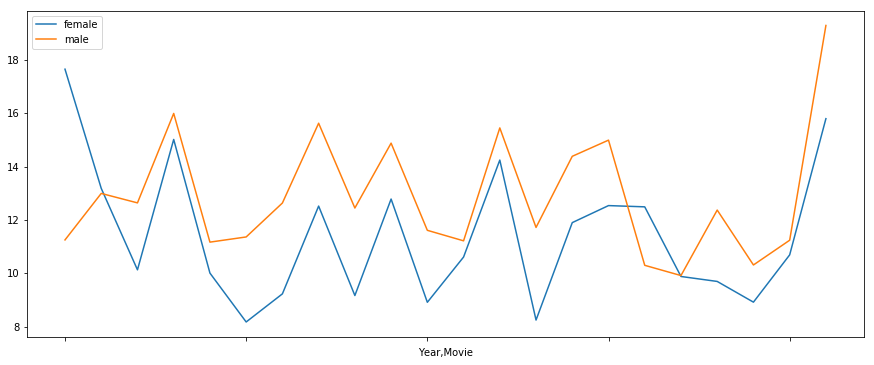

In [32]:
f_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'f']
m_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'm']

f_tok_by_year = f_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]

m_tok_by_year = m_lines.groupby(['Year', 'Movie'])["Token_Count"].describe()["mean"]  

f_tok_by_year.plot(figsize = (15,6))
m_tok_by_year.plot(figsize = (15,6))
plt.legend(['female', 'male'])
plt.show()                                                                           

Interesting! Overall it seems that overtime lines have gotten shorter, and males always have longer lines than females, but the gap has definitely decreased!

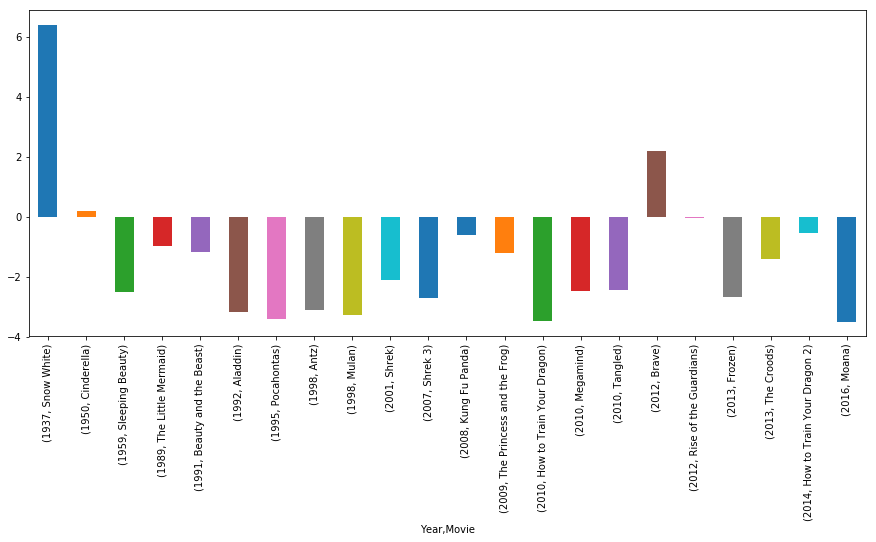

In [33]:
#let's analyze this gap...
f_m_tok_diff = f_tok_by_year - m_tok_by_year
#anything positive indicates females spoke more per line, anything negative indicates men spoke more...
f_m_tok_diff.plot(kind='bar', figsize=(15,6))

## Average Type Count per Line in Each Movie By Gender

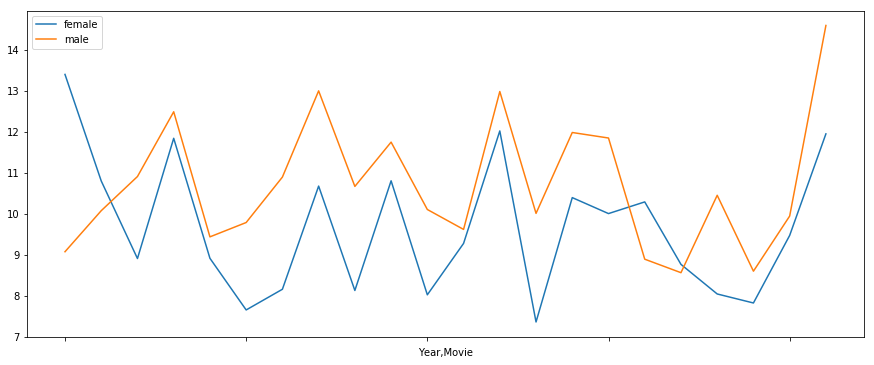

In [34]:
#type counts?
f_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'f']
m_lines = movie_df_dialogue[movie_df_dialogue.Gender == 'm']

f_type_by_year = f_lines.groupby(['Year','Movie'])["Type_Count"].describe()['mean']
m_type_by_year = m_lines.groupby(['Year','Movie'])["Type_Count"].describe()['mean']  

#FIND A WAY TO GET LABELS ON AXES!!!

f_type_by_year.plot(figsize = (15, 6))
m_type_by_year.plot(figsize = (15, 6))
plt.legend(['female', 'male'])
plt.show()

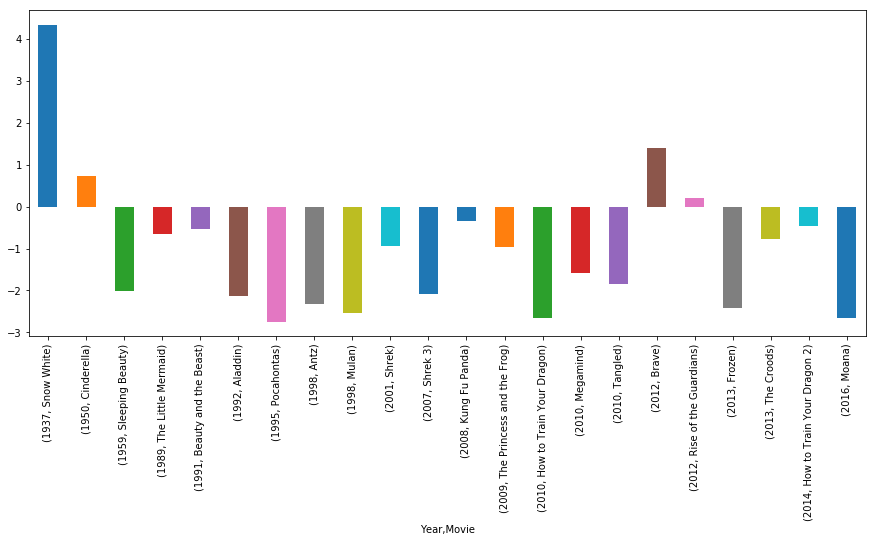

In [35]:
#let's analyze this gap...
f_m_type_diff = f_type_by_year - m_type_by_year
#anything positive indicates females spoke more, anything negative indicates men spoke more...
f_m_type_diff.plot(kind='bar', figsize=(15,6))

Looks like a similar trend...Snow white and Brave seem to be outliers here. Statistical testing will have to be performed.

## Average Token Count/Line by Gender in Each Movie

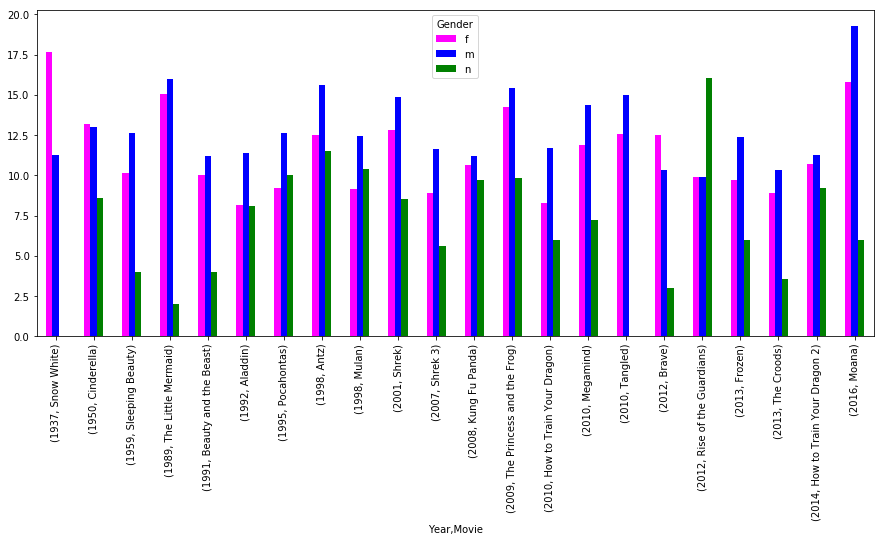

In [36]:
subgroup_2 = movie_df_dialogue.groupby(['Year','Movie','Gender'])["Token_Count"].describe()['mean']
subgroup_2.unstack().plot.bar(color=['magenta', 'blue', 'green'], figsize = (15,6))

At first glance, the average token counts between genders aren't nearly as different as they were for some Disney films...

P.S. The graph above of average token count by gender in each film. (A different visualization of the same stats found in the line plots above)

## Average Type Count/Line by Gender in Each Movie

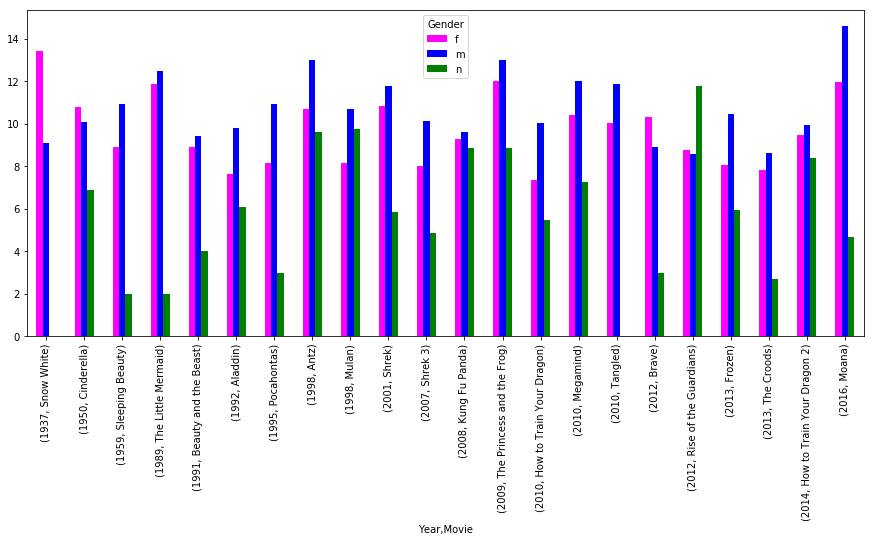

In [37]:
subgroup_3 = movie_df_dialogue.groupby(['Year','Movie','Gender'])["Type_Count"].describe()['mean']
subgroup_3.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

The average type count is higher for female speakers in guardians!!

In [38]:
#Seeing number of lines by gender for each movie
#aka, total number of lines per gender in each movie
total_lines_per_gen = movie_df_dialogue.groupby(['Year','Movie'])['Gender'].value_counts()
total_lines_per_gen

Year  Movie                       Gender
1937  Snow White                  m         214
                                  f         123
1950  Cinderella                  f         260
                                  m         194
                                  n          21
1959  Sleeping Beauty             f         318
                                  m         114
                                  n           2
1989  The Little Mermaid          m         259
                                  f         117
                                  n           1
1991  Beauty and the Beast        m         436
                                  f         199
                                  n           3
1992  Aladdin                     m         657
                                  f         118
                                  n          10
1995  Pocahontas                  m         365
                                  f         190
                                  n           1

In [39]:
#The total number of female/male characters per movie
num_char_per_gen = movie_df_dialogue.groupby(['Year','Movie','Gender'])["Speaker"].unique().map(len)

In [40]:
num_char_per_gen

Year  Movie                       Gender
1937  Snow White                  f          2
                                  m         13
1950  Cinderella                  f          8
                                  m         11
                                  n          6
1959  Sleeping Beauty             f          7
                                  m          8
                                  n          1
1989  The Little Mermaid          f          8
                                  m         15
                                  n          1
1991  Beauty and the Beast        f          8
                                  m         18
                                  n          2
1992  Aladdin                     f          2
                                  m         22
                                  n          4
1995  Pocahontas                  f          3
                                  m         13
                                  n          1
1998  Antz         

In [41]:
#total number of lines / total number of characters
avg_lines_per_gen = total_lines_per_gen.divide(num_char_per_gen)
# This returns movies in alphabetical order, not chronological order. Need to reindex

In [42]:
avg_lines_per_gen = avg_lines_per_gen.reindex(index = total_lines_per_gen.index)
avg_lines_per_gen

Year  Movie                       Gender
1937  Snow White                  m          16.461538
                                  f          61.500000
1950  Cinderella                  f          32.500000
                                  m          17.636364
                                  n           3.500000
1959  Sleeping Beauty             f          45.428571
                                  m          14.250000
                                  n           2.000000
1989  The Little Mermaid          m          17.266667
                                  f          14.625000
                                  n           1.000000
1991  Beauty and the Beast        m          24.222222
                                  f          24.875000
                                  n           1.500000
1992  Aladdin                     m          29.863636
                                  f          59.000000
                                  n           2.500000
1995  Pocahontas        

## Total Lines per Gender in Each Movie

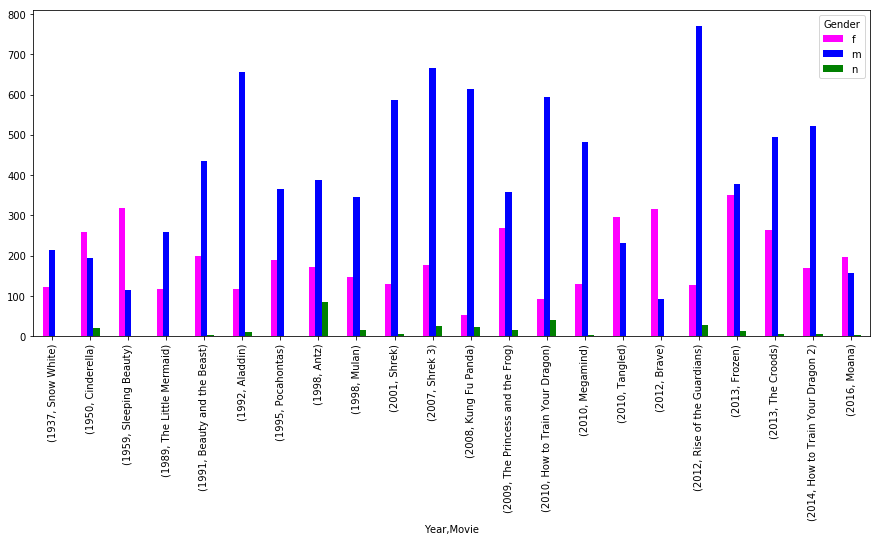

In [43]:
total_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15, 6))

In terms of total number of lines, men dominate.

## Average Number of Lines per Gender in Each Movie
Here, I divide the total number of lines per gender by the number of male and female characters in each movie, to get the average number of lines uttered by men and women in each movie

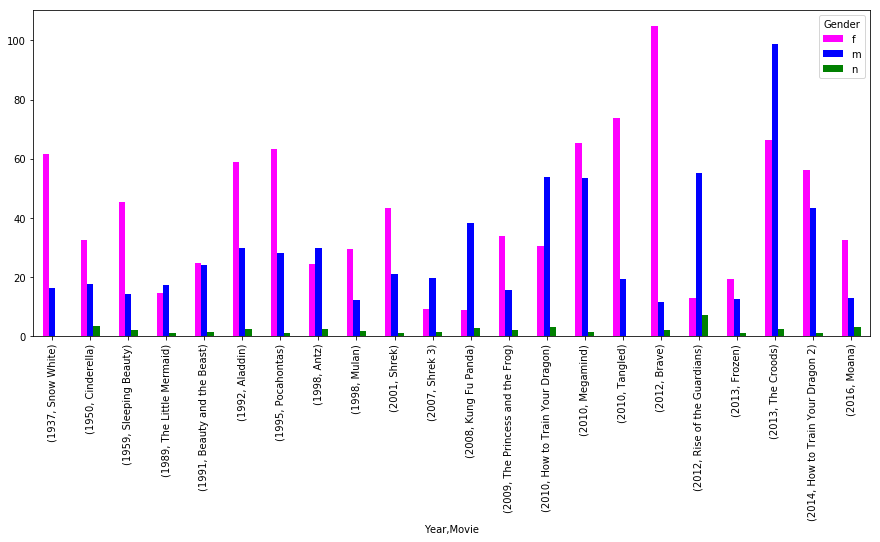

In [44]:
### Oh...interesting....
avg_lines_per_gen.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize=(15,6))

When you take the number of male and female characters into account, you find that for a few Dreamworks movies, on average female characters tend to have more lines. This makes sense for movies like Shrek and HTTYD, which have one main female character with a lot of lines. Rise of the guardians, on the other hand, consists of several minor female characters. Overall, female characters average more lines in the Disney Princess movies, but not in Dreamworks movies.

In [45]:
#pickle our dataframe annotated with tokens/types and counts
movie_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\all_movies_toktype.pkl")